In [87]:
import pandas as pd

In [88]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/jaygil8755/ML01/master/train.csv")

In [89]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
titanic_train.shape

(891, 12)

In [91]:
titanic_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [92]:
titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [93]:
titanic_train.shape

(891, 8)

In [94]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [95]:
titanic_train["Sex"] = titanic_train["Sex"].map({'male' : 1,'female' : 0})

In [96]:
titanic_train['Sex'].describe()

count    891.000000
mean       0.647587
std        0.477990
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [97]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [98]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [99]:
titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)

In [100]:
titanic_train['Age'].isnull().sum()

0

In [101]:
titanic_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [102]:
titanic_train['Embarked'].fillna("S",inplace=True)
titanic_train['Embarked'].isnull().sum()

0

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

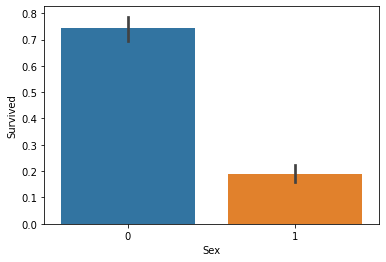

In [104]:
sns.barplot(x='Sex',y='Survived',data=titanic_train)
plt.show()

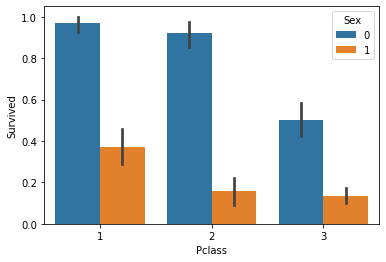

In [105]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_train)
plt.show()

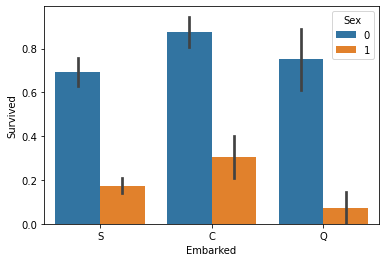

In [106]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=titanic_train)
plt.show()

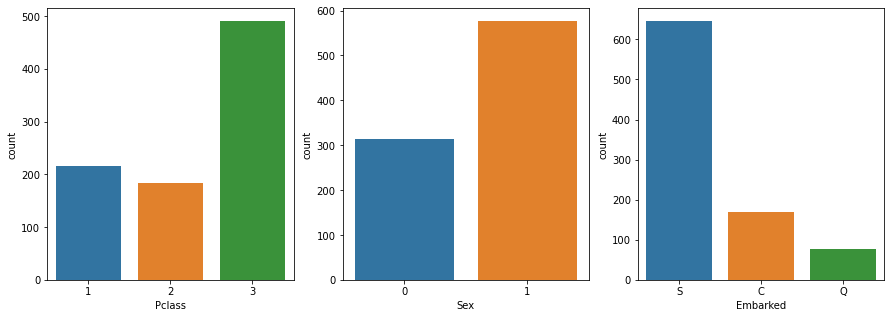

In [107]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x="Pclass",data=titanic_train, ax=ax1)
sns.countplot(x="Sex",data=titanic_train, ax=ax2)
sns.countplot(x="Embarked", data=titanic_train, ax=ax3)

plt.show()

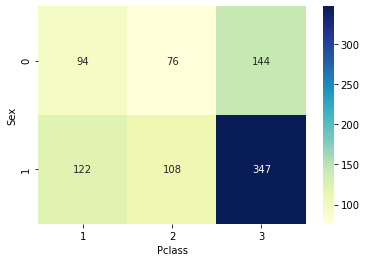

In [108]:
table = titanic_train.pivot_table(index=['Sex'],columns=['Pclass'],aggfunc='size')
sns.heatmap(table, annot=True,
            fmt='d',
            cmap='YlGnBu')
plt.show()

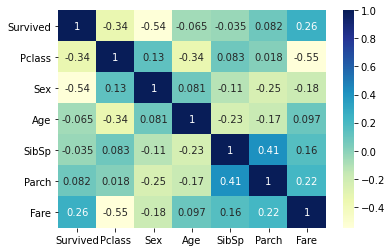

In [109]:
sns.heatmap(titanic_train.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [110]:
titanic_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000


C:\Users\qnzl3\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\qnzl3\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\qnzl3\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


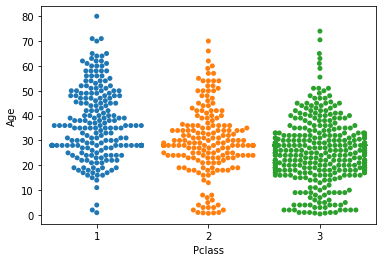

In [111]:
sns.swarmplot(x="Pclass", y="Age", data=titanic_train)
plt.show()

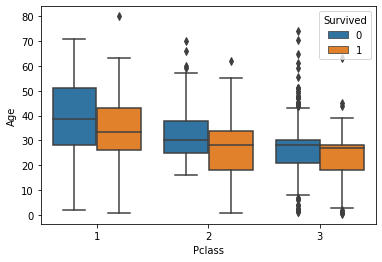

In [112]:
sns.boxplot(x='Pclass',y='Age',hue='Survived',data=titanic_train)
plt.show()

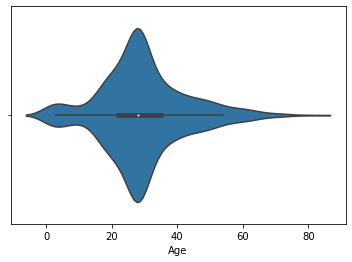

In [113]:
sns.violinplot(x=titanic_train["Age"])
plt.show()

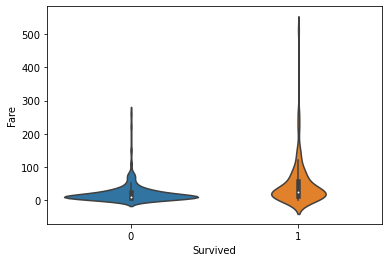

In [114]:
sns.violinplot(x="Survived",y="Fare",data=titanic_train)
plt.show()

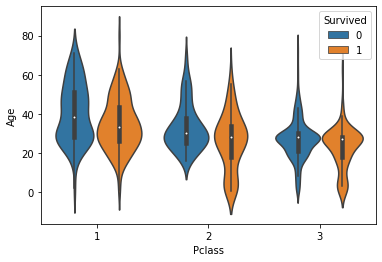

In [115]:
sns.violinplot(x="Pclass",y="Age",hue="Survived",data=titanic_train)
plt.show()

In [116]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [156]:
titanic_train = pd.read_csv("https://raw.githubusercontent.com/jaygil8755/ML01/master/train.csv")

In [157]:
titanic_train.drop(['PassengerId',"Name","Ticket","Cabin"],axis=1, inplace=True)

In [158]:
titanic_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [159]:
titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
titanic_train['Embarked'].fillna("S",inplace=True)

In [160]:
titanic_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [161]:
titanic_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [162]:
블랙핑크 = ["제니","지수","로제","리사"]
df_블랙핑크 = pd.DataFrame({'블랙핑크':블랙핑크})
df_블랙핑크

,블랙핑크
0,제니
1,지수
2,로제
3,리사


In [163]:
pd.get_dummies(titanic_train)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [164]:
titanic_train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [165]:
titanic_train['Pclass']=titanic_train['Pclass'].astype(str)
pd.get_dummies(titanic_train).head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [166]:
titanic_train = pd.get_dummies(titanic_train)

In [167]:
titanic_feature = titanic_train.drop('Survived', axis=1)
titanic_label = titanic_train['Survived']

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train, x_test, y_train, y_test = train_test_split(titanic_feature,titanic_label)

In [170]:
x_train.shape, y_train.shape

((668, 12), (668,))

In [171]:
x_test.shape, y_test.shape

((223, 12), (223,))

In [172]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
689,15.0,0,1,211.3375,1,0,0,1,0,0,0,1
647,56.0,0,0,35.5000,1,0,0,0,1,1,0,0
702,18.0,0,1,14.4542,0,0,1,1,0,1,0,0
168,28.0,0,0,25.9250,1,0,0,0,1,0,0,1
496,54.0,1,0,78.2667,1,0,0,1,0,1,0,0


In [173]:
y_train.head()

689    1
647    1
702    0
168    0
496    1
Name: Survived, dtype: int64

In [174]:
from sklearn.tree import DecisionTreeClassifier

In [175]:
model = DecisionTreeClassifier()

In [176]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [177]:
prediction = model.predict(x_test)

In [178]:
from sklearn.metrics import accuracy_score

In [179]:
accuracy_score(y_test, prediction)

0.8071748878923767

In [180]:
(y_test == prediction).mean()

0.8071748878923767

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

titanic_feature = titanic_train.drop('Survived', axis=1)
titanic_label = titanic_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(titanic_feature,titanic_label)

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

prediction = model.predict(x_test)

print('정확도는: %3f' % accuracy_score(y_test, prediction))

정확도는: 0.793722
